# Digit Recognizer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
train = pd.read_csv("train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [10]:
len(train)

42000

In [4]:
test = pd.read_csv("test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
len(test)

28000

In [13]:
train.columns = [i for i in range(0, 785)]
train = np.array(train)

test.columns = [i for i in range(0, 784)]
test = np.array(test)

img_rows, img_cols = 28, 28
num_classes = 10

num_images = test.shape[0]
test_images = test.reshape(num_images, img_rows, img_cols, 1)
test_images = test_images / 255

def prep_data(raw_data):
    
    out_y = raw_data[:, 0]    
    
    x = raw_data[:,1:]
    num_images = raw_data.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    
    return out_x, out_y

x, y = prep_data(train)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")])
model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x, y, batch_size=32, epochs=10, verbose=1, validation_split = 0.2)

2022-09-01 19:24:43.394372: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
1050/1050 [==============================] - 93s 88ms/step - loss: 0.1299 - accuracy: 0.9611 - val_loss: 0.0578 - val_accuracy: 0.9824
Epoch 2/10
1050/1050 [==============================] - 126s 120ms/step - loss: 0.0471 - accuracy: 0.9863 - val_loss: 0.0389 - val_accuracy: 0.9877
Epoch 3/10
1050/1050 [==============================] - 123s 117ms/step - loss: 0.0282 - accuracy: 0.9915 - val_loss: 0.0507 - val_accuracy: 0.9833
Epoch 4/10
1050/1050 [==============================] - 97s 92ms/step - loss: 0.0194 - accuracy: 0.9943 - val_loss: 0.0351 - val_accuracy: 0.9893
Epoch 5/10
1050/1050 [==============================] - 85s 81ms/step - loss: 0.0132 - accuracy: 0.9964 - val_loss: 0.0348 - val_accuracy: 0.9888
Epoch 6/10
1050/1050 [==============================] - 83s 79ms/step - loss: 0.0079 - accuracy: 0.9981 - val_loss: 0.0426 - val_accuracy: 0.9874
Epoch 7/10
1050/1050 [==============================] - 85s 81ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.03

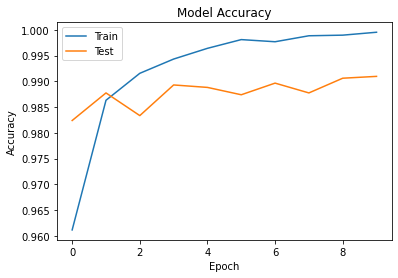

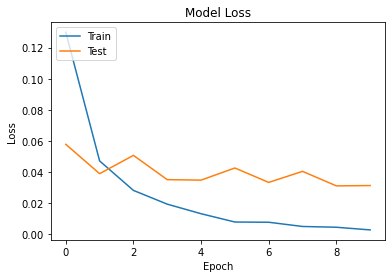

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"], loc="upper left")
plt.show()

In [17]:
predict = model.predict(test_images)

tahmin = pd.DataFrame({'ImageId': [i for i in range(1, 28001)], 'Label': np.argmax(predict, axis = 1)})
tahmin.head()

875/875 [==============================] - 20s 23ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [18]:
tahmin.to_csv('sonuc.csv', index = False)